---
# <center> Gated Recurrent Unit (GRU)
---
<font color="LIGHTSLATEGRAY">Prepared by **NICHOLAS DOMINIC**
<br>Guided from *Leonardo De Marchi and Laura Mitchell's* **Hands-On Neural Network** (by Packt Publishing)
<br>Powered by Interactive Python **Jupyter Notebook** (.ipynb), developed with **Python 3.7**

In [1]:
import numpy as np
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame as df
from tensorflow import keras
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator as mx

In [2]:
np.__version__, tf.__version__, keras.__version__

('1.18.2', '2.2.0', '2.3.0-tf')

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

## GRU Supporting User-defined Function

In [4]:
def generate_time_series_data(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

## Time Series Dataset Loading

In [5]:
# set y(t+1)
look_back = 1

x_train (65, 1, 1) y_train (65,)
x_test (33, 1, 1) y_test (33,)


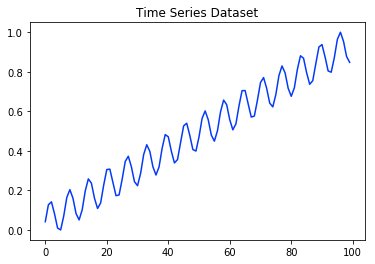

In [6]:
# create the dataset
sin_wave = np.array([math.sin(x) + i * .1 for i, x in enumerate(np.arange(100))])
dataset = sin_wave.reshape(len(sin_wave), 1)

# normalize the dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

# split into train_data and test_data
train_size = int(len(dataset) * 2/3)
test_size = len(dataset) - train_size
train_data, test_data = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# assign features (x) and labels (y) for each
x_train, y_train = generate_time_series_data(train_data)
x_test, y_test = generate_time_series_data(test_data)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# plot the dataset
plt.title("Time Series Dataset")
plt.plot(dataset, color="xkcd:vibrant blue")

# print out shape of each
print("x_train {} y_train {}".format(x_train.shape, y_train.shape))
print("x_test {} y_test {}".format(x_test.shape, y_test.shape))

## GRU

In [7]:
gru_model = keras.models.Sequential([
    keras.layers.GRU(4, return_sequences=True, input_shape=[1, look_back]),
    keras.layers.GRU(4, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

gru_model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=1e-3))
gru_model_history = gru_model.fit(x_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0761
Epoch 2/50
65/65 [==============================] - 0s 5ms/step - loss: 0.0275
Epoch 3/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0217
Epoch 4/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0198
Epoch 5/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0185
Epoch 6/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0160
Epoch 7/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0143
Epoch 8/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 9/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 10/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0086
Epoch 11/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 12/50
65/65 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 13/50
65/65 [==============================

In [8]:
gru_model.evaluate(x_test, y_test, batch_size=1)

33/33 [==============================] - 0s 3ms/step - loss: 0.0035


0.0034639579243957996

Text(0, 0.5, 'Scores')

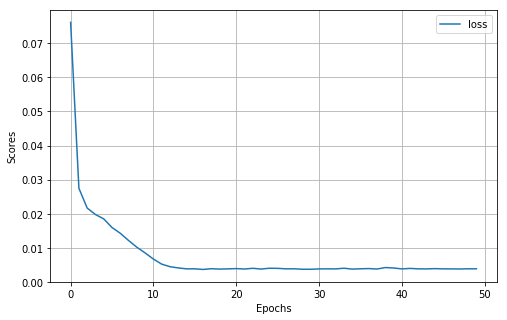

In [9]:
df(gru_model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Scores")

In [10]:
# create the predictions
predictions_train = gru_model.predict(x_train)
predictions_test = gru_model.predict(x_test)

# reapply the MinMaxScaler() to predictions
predictions_train = scaler.inverse_transform(predictions_train[:, 0])
predictions_test = scaler.inverse_transform(predictions_test[:, 0])
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

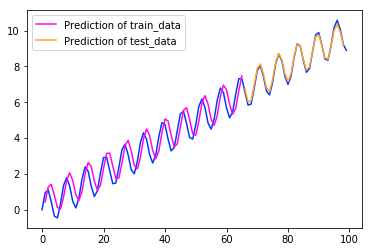

In [11]:
# shift train predictions for plotting
predictions_train_plot = np.empty_like(dataset) # provide a new array with the same shape and type as dataset
predictions_train_plot[:, :] = np.nan # assign them all with nan
predictions_train_plot[look_back:len(predictions_train) + look_back, :] = predictions_train # shape [1:65, :]

# shift test predictions for plotting
predictions_test_plot = np.empty_like(dataset) # provide a new array with the same shape and type as dataset
predictions_test_plot[:, :] = np.nan # assign them all with nan
predictions_test_plot[len(predictions_train) + 1:len(dataset) -1, :] = predictions_test # shape [66:99, :]

plt.plot(scaler.inverse_transform(dataset), color="xkcd:vibrant blue")
plt.plot(predictions_train_plot, label='Prediction of train_data', color="xkcd:bright magenta")
plt.plot(predictions_test_plot, label='Prediction of test_data', color="xkcd:mango")
plt.legend(loc='best')